In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.executable

'/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/bin/python'

## Load Data

In [24]:
td = pd.read_csv('https://metrics.torproject.org/stats/clients.csv') # tor metrics: clients
td['date'] = pd.to_datetime(td['date'])
start_date = pd.to_datetime('2017-01-01') # remove earlier data due to noise
td = td[td['date'] >= start_date] # filter from start date to current
td = td.groupby(["country","date"]).sum()
td = pd.DataFrame(td)
td.to_pickle('data/torclients.pkl')

## EDA

In [28]:
td = pd.read_pickle('data/torclients.pkl')

start_date_formatted = str(start_date).replace('-','').split(' ')[0]


# https://explorer.ooni.io/highlights/
country_list = [('cn','China'),('ru','Russia'),('ir','Iran'),('sa','Saudi Arabia'),('tr','Turkey'),('in','India'),('id','Indonesia'),
                ('gr','Greece'),('sd','Sudan'),('be','Belgium'),('cy','Cyprus'),('kr','Korea'),('de','Germany'),('us','United States')]
country_dict = {}
for country in country_list:
    country_dict[country] = td.loc[country[0],:]
    country_dict[country]['date'] = country_dict[country].index

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


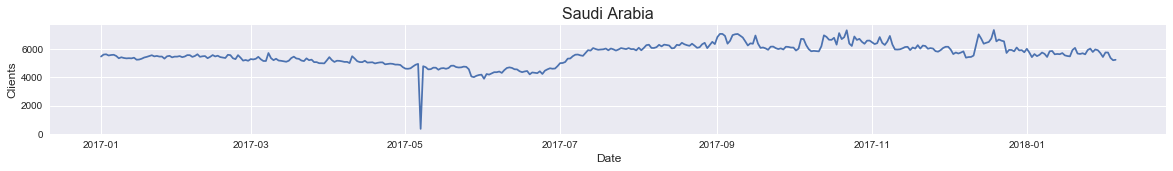

None


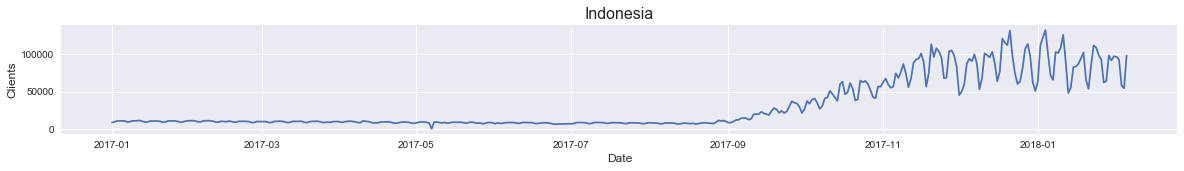

None


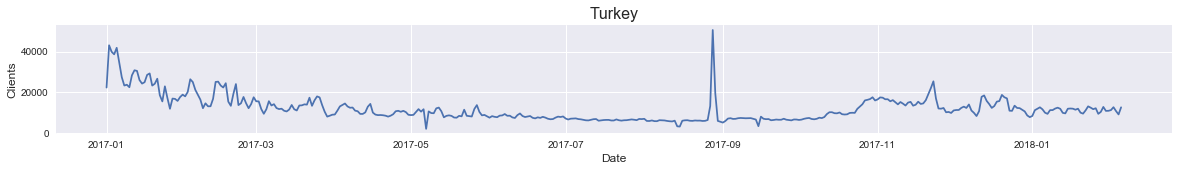

None


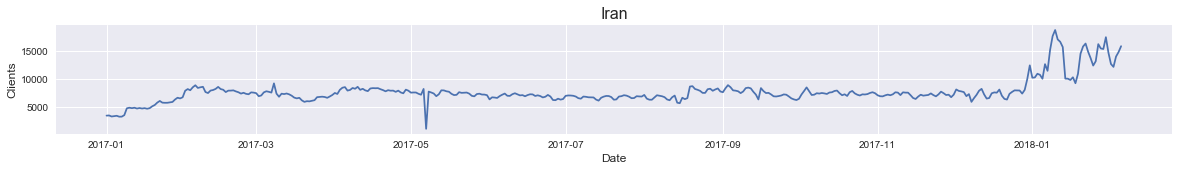

None


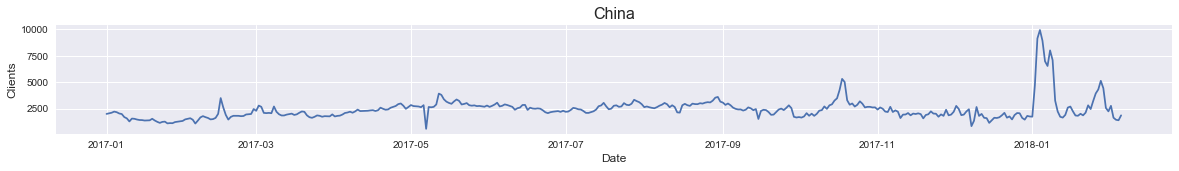

None


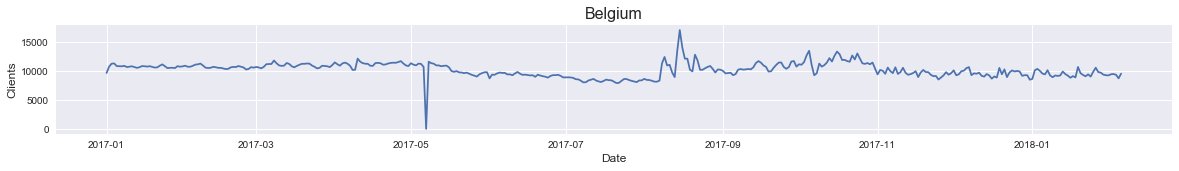

None


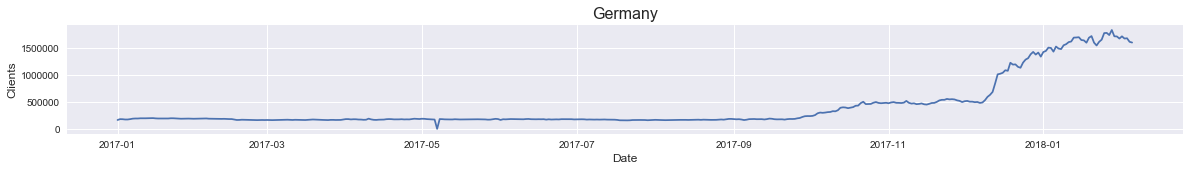

None


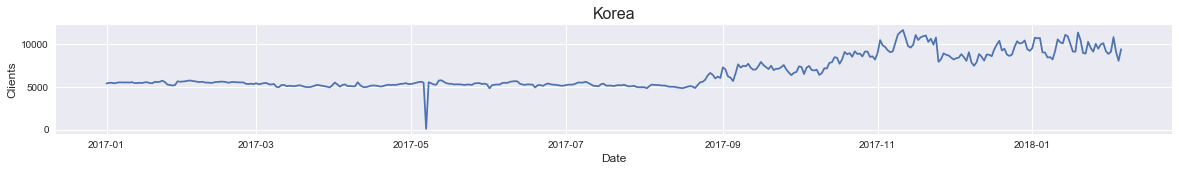

None


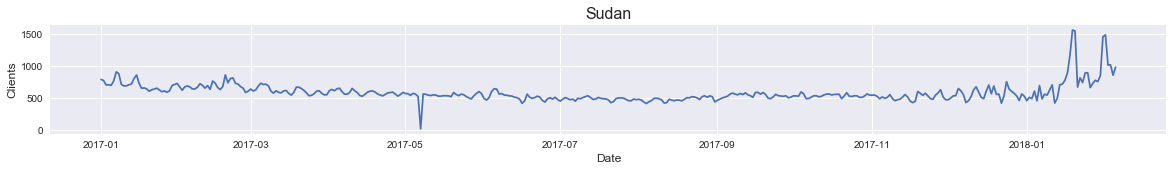

None


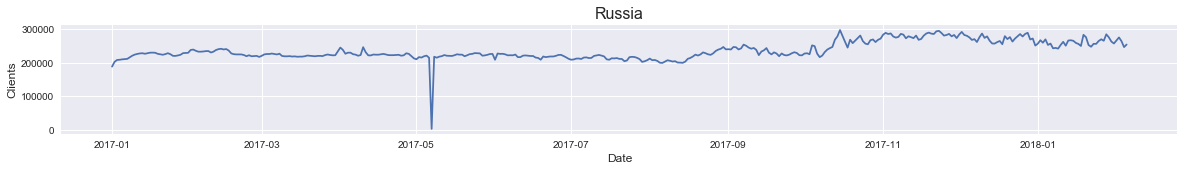

None


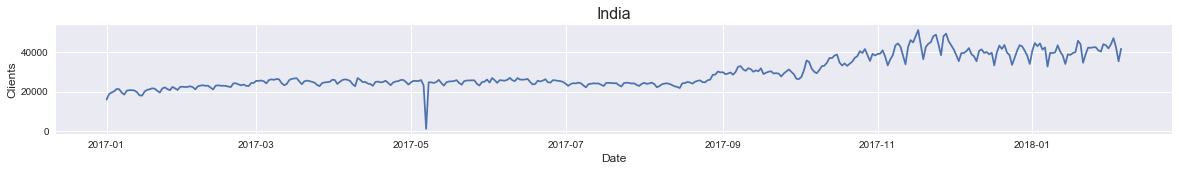

None


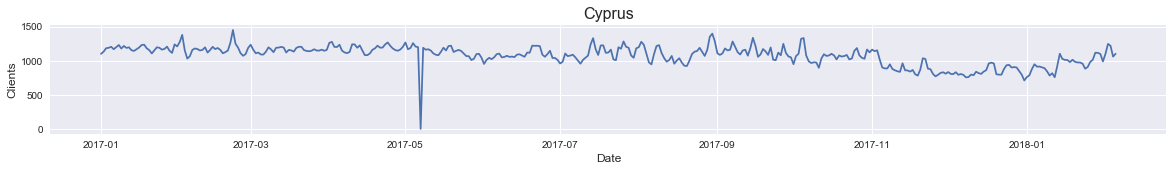

None


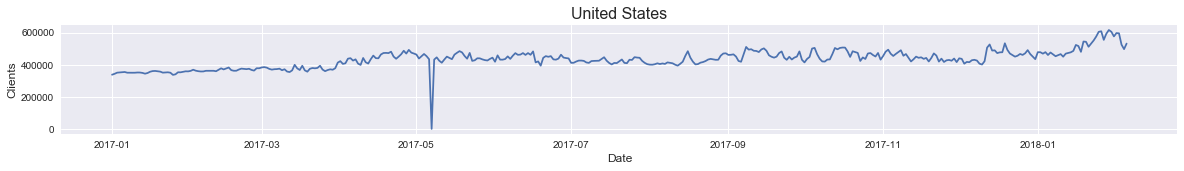

None


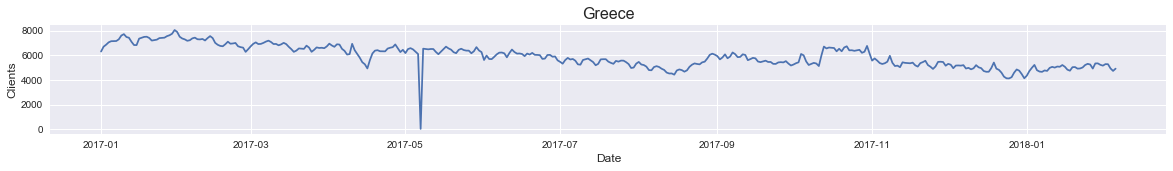

None


In [29]:
for k, v in country_dict.items():
    country_short, country_long = k
    y = country_dict[k]['clients']
    x = country_dict[k]['date']

    fig, ax = plt.subplots(figsize=(20, 2))
    plt.plot(x,y)
    plt.title(country_long,fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Clients', fontsize=12)
    plt.savefig('charts/' + country_short + start_date_formatted + '.png')
    print(plt.show()) 

In [2]:
# https://haveibeenpwned.com/api/v2/breaches

df1 = pd.read_json('data/pwned20180202.json')
print(df1.shape)
df1

(265, 16)


,AddedDate,BreachDate,DataClasses,Description,Domain,IsActive,IsFabricated,IsRetired,IsSensitive,IsSpamList,IsVerified,LogoType,ModifiedDate,Name,PwnCount,Title
0,2015-10-26T23:35:45Z,2015-03-01,"[Email addresses, IP addresses, Names, Passwords]","In approximately March 2015, the free web host...",000webhost.com,True,False,False,False,False,True,png,2017-12-10T21:44:27Z,000webhost,14936670,000webhost
1,2016-10-08T07:46:05Z,2012-01-01,"[Email addresses, Passwords]","In approximately 2012, it's alleged that the C...",126.com,True,False,False,False,False,False,svg,2016-10-08T07:46:05Z,126,6414191,126
2,2016-07-08T01:55:03Z,2016-04-19,"[Device information, Email addresses, IP addre...","In April 2016, customer data obtained from the...",17app.co,True,False,False,False,False,True,svg,2016-07-08T01:55:03Z,17Media,4009640,17
3,2018-01-07T08:19:39Z,2017-12-20,"[Email addresses, Passwords, Usernames]","In December 2017, the Belgian motorcycle forum...",2fast4u.be,True,False,False,False,False,True,png,2018-01-07T08:19:39Z,2fast4u,17706,2fast4u
4,2017-09-26T21:54:01Z,2011-01-01,"[Email addresses, Passwords, Usernames]","In approximately 2011, it's alleged that the C...",7k7k.com,True,False,False,False,False,False,png,2017-09-26T21:54:01Z,7k7k,9121434,7k7k
5,2017-06-05T05:56:47Z,2015-11-01,"[Email addresses, IP addresses, Passwords, Use...","In November 2015, the gaming website dedicated...",abandonia.com,True,False,False,False,False,True,png,2017-06-05T05:56:47Z,Abandonia,776125,Abandonia
6,2017-10-09T11:08:45Z,2016-07-01,"[Email addresses, IP addresses, Passwords, Use...","In 2016, the site dedicated to helping people ...",abusewith.us,True,False,False,False,False,True,png,2017-10-09T11:08:45Z,AbuseWithUs,1372550,AbuseWith.Us
7,2016-03-06T11:07:41Z,2014-11-25,"[Dates of birth, Email addresses, IP addresses...","In November 2014, the acne website <a href=""ht...",acne.org,True,False,False,False,False,True,svg,2016-03-06T11:07:41Z,AcneOrg,432943,Acne.org
8,2013-12-04T00:00:00Z,2013-10-04,"[Email addresses, Password hints, Passwords, U...","In October 2013, 153 million Adobe accounts we...",adobe.com,True,False,False,False,False,True,svg,2013-12-04T00:00:00Z,Adobe,152445165,Adobe
9,2015-05-22T06:03:44Z,2015-05-21,"[Dates of birth, Email addresses, Genders, Geo...","In May 2015, the adult hookup site <a href=""ht...",adultfriendfinder.com,True,False,False,True,False,True,png,2015-05-22T06:03:44Z,AdultFriendFinder,3867997,Adult Friend Finder


In [3]:
# https://www.privacyrights.org/data-breaches?title=&breach_type%5B%5D=268
pr = pd.read_csv('data/Privacy_Rights_Clearinghouse-Data-Breaches-Export.csv')
print(pr.shape)
pr.tail()

(2314, 9)


,Date Made Public,Company,Location,Type of breach,Type of organization,Total Records,Description of incident,Information Source,Source URL
2309,"January 19, 2018",OnePlus,"Shenzhen, Guangdong",HACK,BSR,"40,000","OnePlus has confirmed that up to 40,000 custom...",Media,https://forums.oneplus.net/threads/jan-19-upda...
2310,"January 19, 2018",Westminster Ingleside King Farm Presbyterian R...,", Maryland",HACK,MED,"5,228",Location of breached information: Desktop Comp...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...
2311,"January 18, 2018",The Pediatric Endocrinology and Diabetes Speci...,", Nevada",HACK,MED,"1,021",Location of breached information: Desktop Comp...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...
2312,"January 12, 2018",Onco360 and CareMed Specialty Pharmacy,", Kentucky",HACK,MED,"53,173",Location of breached information: Email\nBusin...,US Department of Health and Human Services,https://ocrportal.hhs.gov/ocr/breach/breach_re...
2313,"February 1, 2018",Department of Homeland Security,", District Of Columbia",HACK,GOV,"246,167",A data breach at the Department of Homeland Se...,Government Agency,https://www.dhs.gov/news/2018/01/18/privacy-in...


In [21]:
td.head()

,date,node,country,transport,version,lower,upper,clients,frac
0,2011-03-06,relay,a1,NaN,NaN,NaN,NaN,1443,11
1,2011-03-06,relay,a2,NaN,NaN,NaN,NaN,424,11
2,2011-03-06,relay,ad,NaN,NaN,NaN,NaN,70,11
3,2011-03-06,relay,ae,NaN,NaN,NaN,NaN,8395,11
4,2011-03-06,relay,af,NaN,NaN,NaN,NaN,170,11


lower  upper  clients  frac
country date                                   
??      2017-01-01    0.0    0.0    22080   137
        2017-01-02    0.0    0.0    23925   135

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


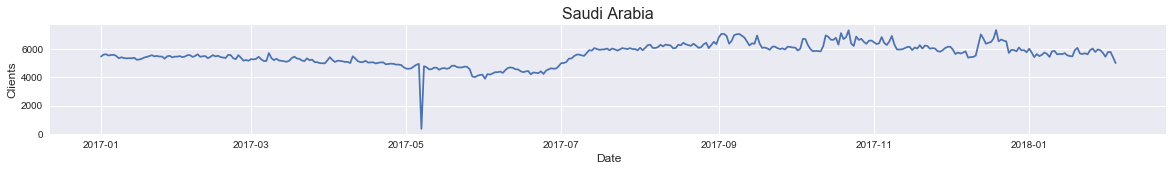

None


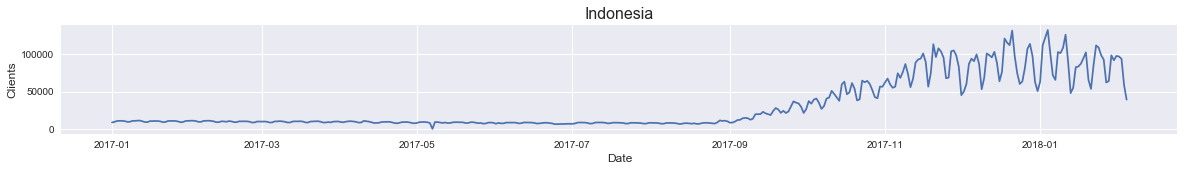

None


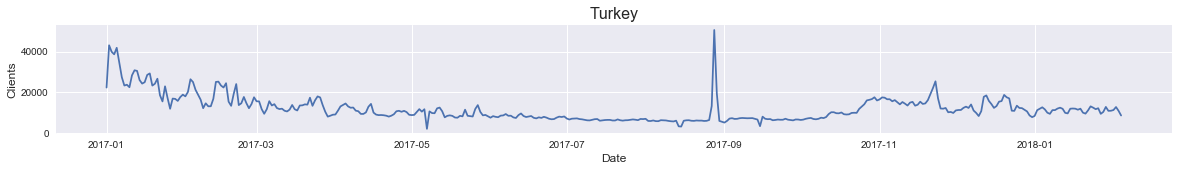

None


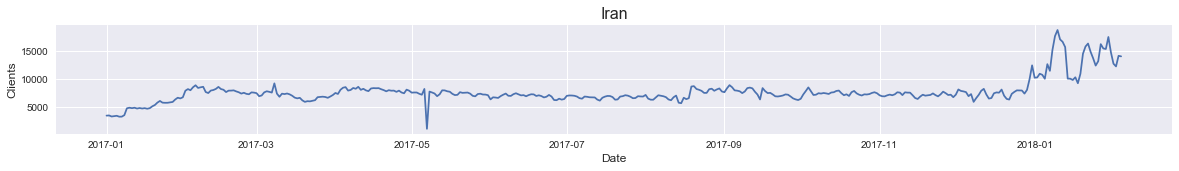

None


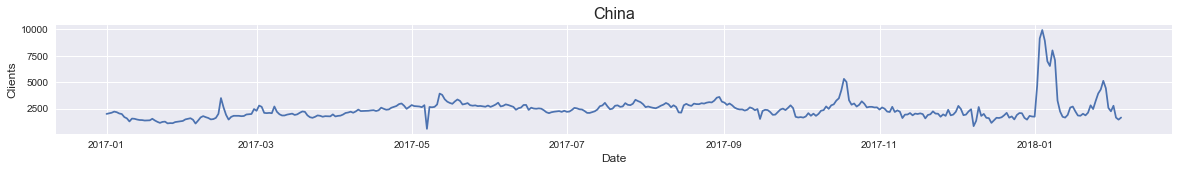

None


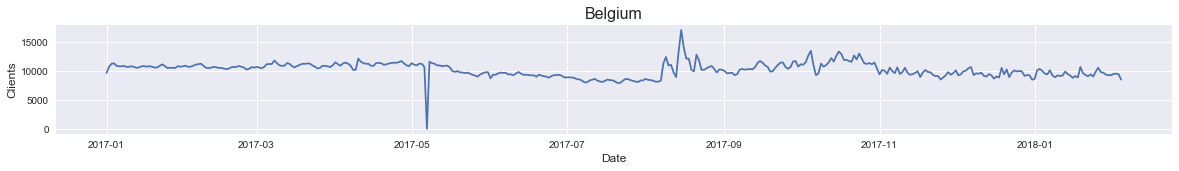

None


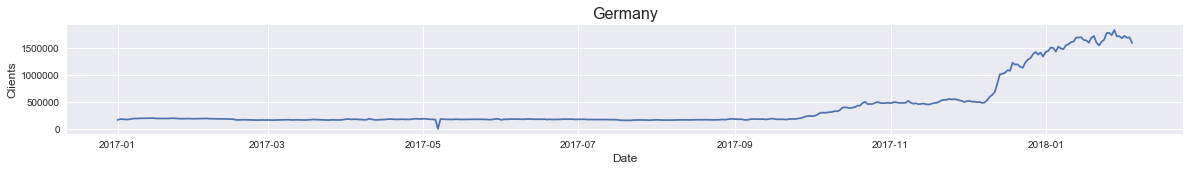

None


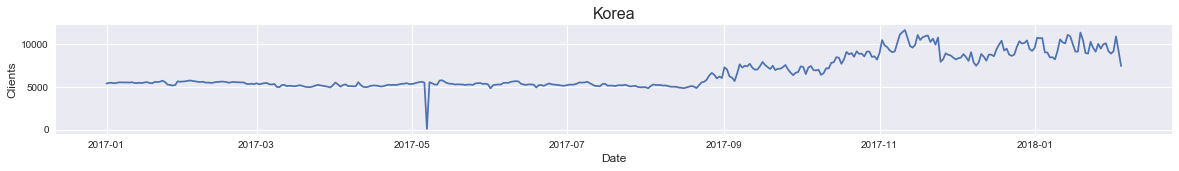

None


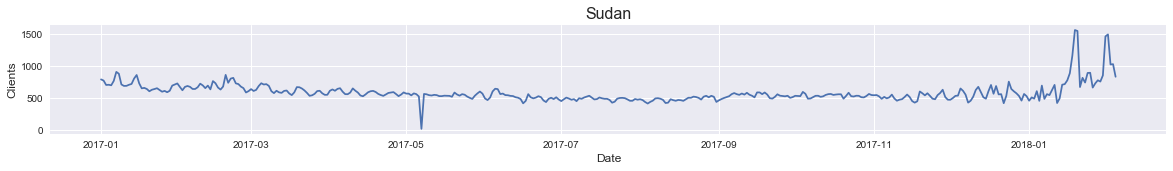

None


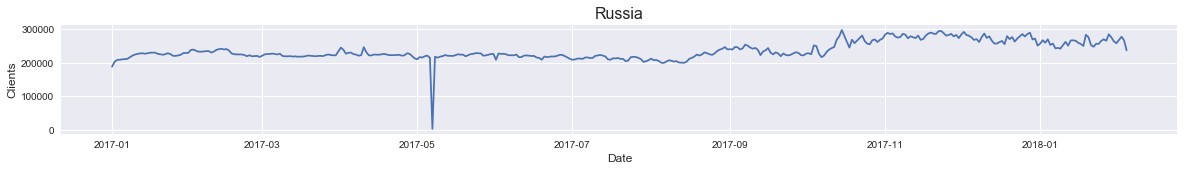

None


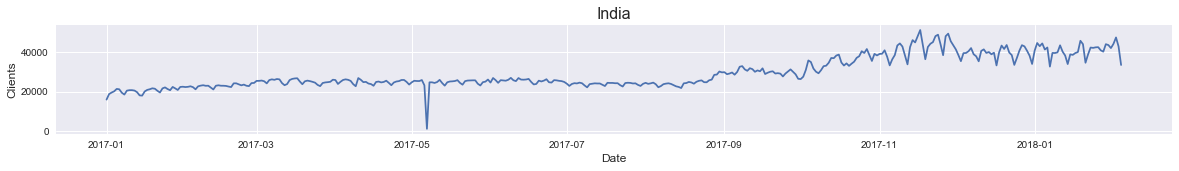

None


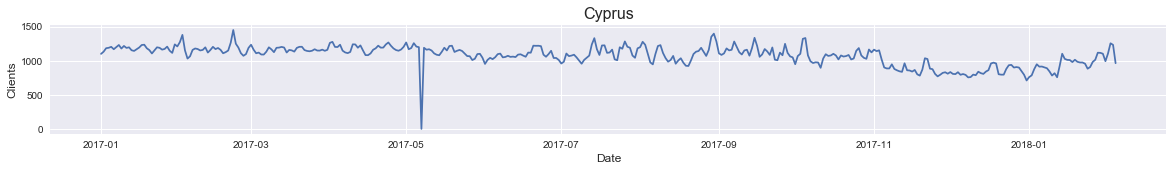

None


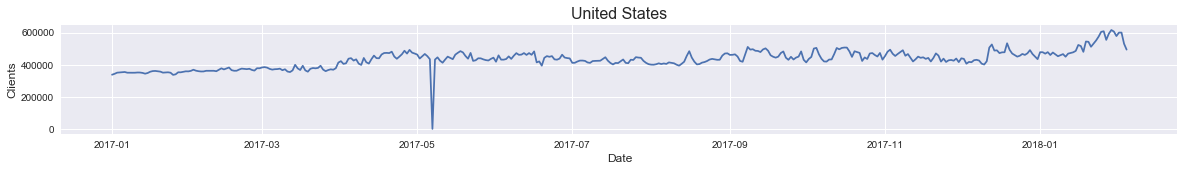

None


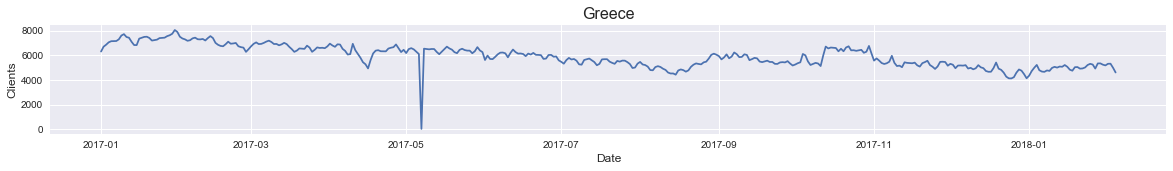

None


In [8]:
td1 = pd.read_csv('data/servers.csv')
print(td1.shape)
td1.head()

(216301, 8)


/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,flag,country,version,platform,ec2bridge,relays,bridges
0,2007-10-27,Exit,NaN,NaN,NaN,NaN,602.0,NaN
1,2007-10-27,Fast,NaN,NaN,NaN,NaN,1126.0,NaN
2,2007-10-27,Guard,NaN,NaN,NaN,NaN,244.0,NaN
3,2007-10-27,HSDir,NaN,NaN,NaN,NaN,0.0,NaN
4,2007-10-27,Stable,NaN,NaN,NaN,NaN,586.0,NaN
